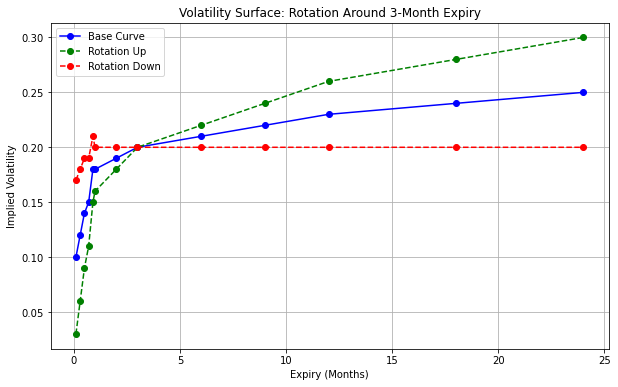

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Expiries in months
expiries = np.array([0.1,0.3,0.5,0.7,0.9,1, 2, 3, 6, 9, 12, 18, 24])

# Base volatility curve (example values)
base_vol = np.array([0.1, 0.12, 0.14, 0.15,0.18,0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25])

# Shock around the 3-month expiry
shock_index = np.where(expiries == 3)[0][0]

# Rotation around the 3-month expiry

# Define a rotation magnitude
rotation_magnitude = 0.01

# Create rotated curves
rotation_up = np.copy(base_vol)
rotation_down = np.copy(base_vol)

# Apply rotation
for i in range(len(expiries)):
    if i < shock_index:
        rotation_up[i] -= (shock_index - i) * rotation_magnitude
        rotation_down[i] += (shock_index - i) * rotation_magnitude
    elif i > shock_index:
        rotation_up[i] += (i - shock_index) * rotation_magnitude
        rotation_down[i] -= (i - shock_index) * rotation_magnitude

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(expiries, base_vol, label='Base Curve', color='blue', marker='o')
plt.plot(expiries, rotation_up, label='Rotation Up', color='green', linestyle='--', marker='o')
plt.plot(expiries, rotation_down, label='Rotation Down', color='red', linestyle='--', marker='o')

# Adding labels and title
plt.xlabel('Expiry (Months)')
plt.ylabel('Implied Volatility')
plt.title('Volatility Surface: Rotation Around 3-Month Expiry')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



In [25]:
rotation_down

array([0.17, 0.18, 0.19, 0.19, 0.21, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 ])

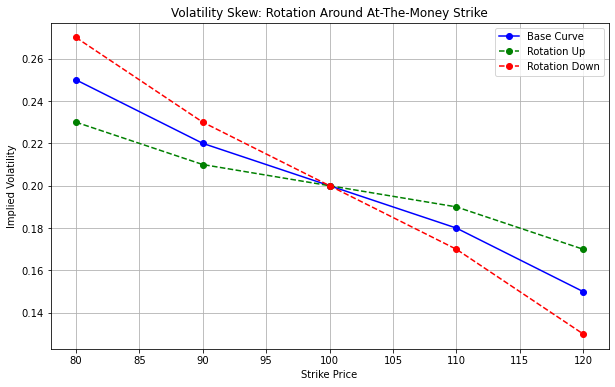

In [5]:
# Strike prices
strikes = np.array([80, 90, 100, 110, 120])  # Assuming 100 is ATM

# Base skew curve (example values)
base_skew = np.array([0.25, 0.22, 0.20, 0.18, 0.15])

# Index of ATM strike (100)
atm_index = np.where(strikes == 100)[0][0]

# Define a rotation magnitude for skew
skew_rotation_magnitude = 0.01

# Create rotated skew curves
skew_rotation_up = np.copy(base_skew)
skew_rotation_down = np.copy(base_skew)

# Apply rotation around the ATM strike
for i in range(len(strikes)):
    if i < atm_index:
        skew_rotation_up[i] -= (atm_index - i) * skew_rotation_magnitude
        skew_rotation_down[i] += (atm_index - i) * skew_rotation_magnitude
    elif i > atm_index:
        skew_rotation_up[i] += (i - atm_index) * skew_rotation_magnitude
        skew_rotation_down[i] -= (i - atm_index) * skew_rotation_magnitude

# Plotting the skew curves
plt.figure(figsize=(10, 6))
plt.plot(strikes, base_skew, label='Base Curve', color='blue', marker='o')
plt.plot(strikes, skew_rotation_up, label='Rotation Up', color='green', linestyle='--', marker='o')
plt.plot(strikes, skew_rotation_down, label='Rotation Down', color='red', linestyle='--', marker='o')

# Adding labels and title
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Skew: Rotation Around At-The-Money Strike')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


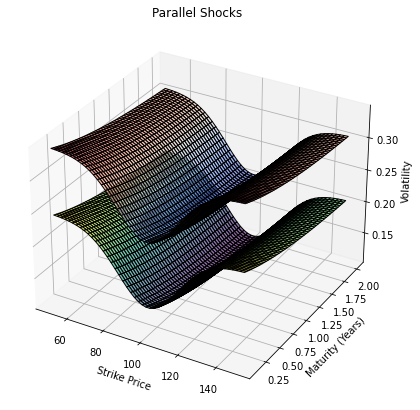

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate data for the volatility surface
strike_prices = np.linspace(50, 150, 50)  # Strike prices
maturities = np.linspace(0.1, 2, 50)  # Maturities in years

# Create a grid of strike prices and maturities
X, Y = np.meshgrid(strike_prices, maturities)

# Define a volatility smile function for demonstration purposes
def volatility_smile(strike, maturity):
    # Base volatility level
    base_vol = 0.2
    # Increase in volatility away from at-the-money (100 strike)
    smile = -0.1 * np.exp(-((strike - 100) ** 2) / 500)
    # Time decay effect
    time_effect = 0.05 * np.exp(-maturity)
    # Return combined effect
    return base_vol + smile + time_effect

# Calculate the volatility surface values
Z = volatility_smile(X, Y)

parallel_shift = 0.1  # Example shift amount
Z_shifted = Z + parallel_shift

# Plot the 3D volatility surfaces, including the shifted one
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original volatility surface
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.6, label='Original Surface')

# Plot the shifted volatility surface
ax.plot_surface(X, Y, Z_shifted, cmap='coolwarm', edgecolor='k', alpha=0.6, label='Shifted Surface')

ax.set_title('Parallel Shocks')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity (Years)')
ax.set_zlabel('Volatility')

plt.show()
